In [12]:
import pandas as pd
import numpy as np

In [13]:
import os

# Install the Kaggle API client
!pip install -q kaggle

In [14]:
import kagglehub

path = kagglehub.dataset_download("rkiattisak/salaly-prediction-for-beginer")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'salaly-prediction-for-beginer' dataset.
Path to dataset files: /kaggle/input/salaly-prediction-for-beginer


In [15]:
import os

# List the files in the 'path' directory to identify the dataset file
files_in_path = os.listdir(path)
print("Files in dataset directory:", files_in_path)

Files in dataset directory: ['Salary Data.csv']


In [16]:
csv_file_name = files_in_path[0]
full_csv_path = os.path.join(path, csv_file_name)

# Load the dataset into a pandas DataFrame
df = pd.read_csv(full_csv_path)

In [17]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


#EDA


In [18]:
df.shape

(375, 6)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [20]:
display(df)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [21]:
df.isnull().sum()

,0
Age,2
Gender,2
Education Level,2
Job Title,2
Years of Experience,2
Salary,2


In [53]:
median_age = df['Age'].median()
median_years_experience = df['Years of Experience'].median()
median_salary = df['Salary'].median()

print(f"Median Age: {median_age}")
print(f"Median Years of Experience: {median_years_experience}")
print(f"Median Salary: {median_salary}")

Median Age: -0.20222929511746532
Median Years of Experience: -0.15699104699610245
Median Salary: 95000.0


In [30]:
df['Age'] = df['Age'].fillna(median_age)
df['Years of Experience'] = df['Years of Experience'].fillna(median_years_experience)
df['Salary'] = df['Salary'].fillna(median_salary)

print("Missing values after median imputation:")
print(df[['Age', 'Years of Experience', 'Salary']].isnull().sum())

Missing values after median imputation:
Age                    0
Years of Experience    0
Salary                 0
dtype: int64


#Data Visualisation

In [22]:
import matplotlib.pyplot as plt

<Axes: >

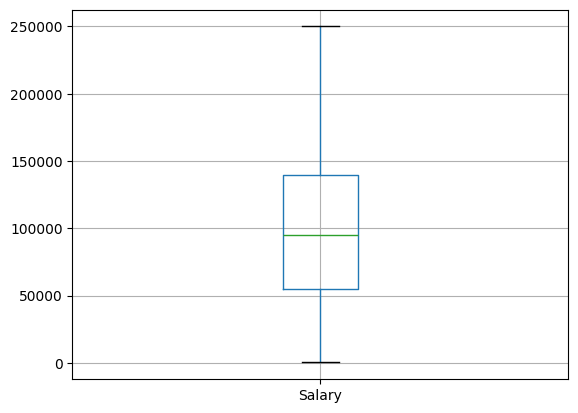

In [54]:
df.boxplot(column='Salary')

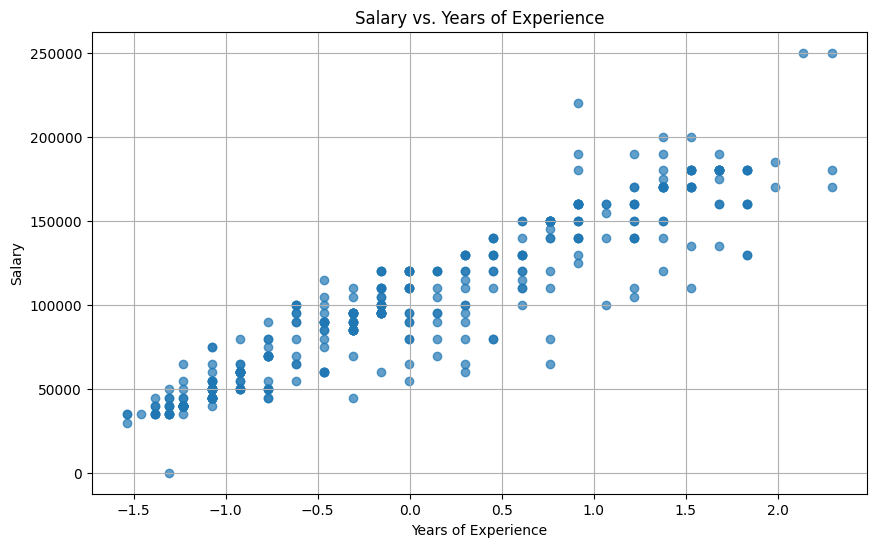

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Years of Experience'], df['Salary'], alpha=0.7)
plt.title('Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

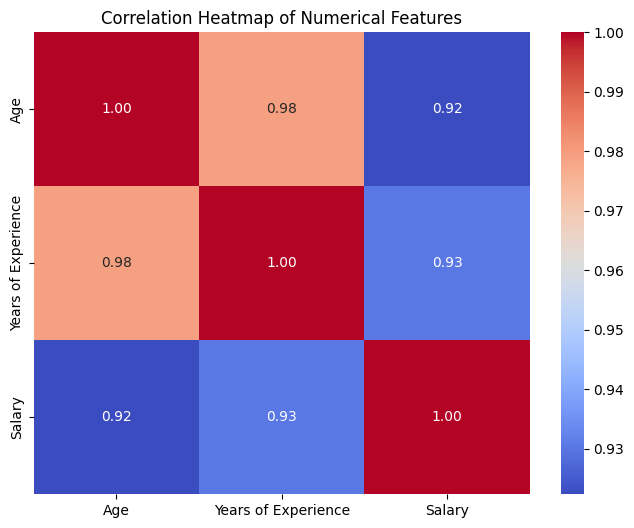

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for numerical columns
correlation_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

#Encoding

In [26]:
df = pd.get_dummies(df, columns=['Gender', 'Education Level', 'Job Title'], drop_first=True)

In [57]:
df

,Age,Years of Experience,Salary,Gender_Male,Education Level_Master's,Education Level_PhD,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Business Analyst,Job Title_Business Development Manager,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,-0.770289,-0.769440,90000.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-1.338349,-1.075664,65000.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.075905,0.761682,150000.0,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.202229,-0.463215,60000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2.070010,1.527243,200000.0,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,-0.344244,-0.310103,85000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
371,0.791875,1.374131,170000.0,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
372,-1.196334,-1.228776,40000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
373,-0.486259,-0.463215,90000.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
print("StandardScaler imported successfully.")

StandardScaler imported successfully.


In [59]:
scaler = StandardScaler()
df[['Age', 'Years of Experience']] = scaler.fit_transform(df[['Age', 'Years of Experience']])

print("DataFrame after feature scaling for 'Age' and 'Years of Experience':")
print(df[['Age', 'Years of Experience']].head())

DataFrame after feature scaling for 'Age' and 'Years of Experience':
        Age  Years of Experience
0 -0.770289            -0.769440
1 -1.338349            -1.075664
2  1.075905             0.761682
3 -0.202229            -0.463215
4  2.070010             1.527243


# Model Training

In [60]:
from sklearn.model_selection import train_test_split

X = df.drop('Salary', axis=1) # Features
y = df['Salary']             # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
# n_estimators=100 means we are using 100 decision trees
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [62]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Model Evaluation

In [63]:
y_pred = model.predict(X_test)

In [64]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

Mean Absolute Error: 10354.0
R-squared Score: 0.892774710006163


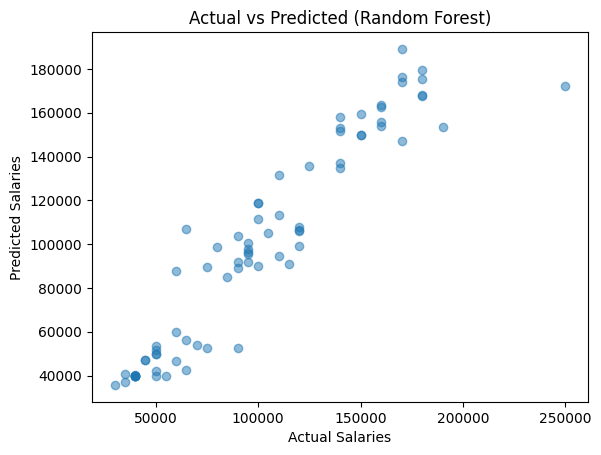

In [39]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Salaries")
plt.ylabel("Predicted Salaries")
plt.title("Actual vs Predicted (Random Forest)")
plt.show()

# Cross Validation


In [52]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Initialize the Random Forest Regressor with the model used for initial evaluation
model_cv = RandomForestRegressor(n_estimators=100, random_state=42)

# Set up K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42) # Using 5 folds

# Perform cross-validation for R-squared score
r2_scores = cross_val_score(model_cv, X, y, cv=kf, scoring='r2')

# Perform cross-validation for Mean Absolute Error (MAE)
# cross_val_score returns negative MAE, so we negate it to get positive MAE
mae_scores = -cross_val_score(model_cv, X, y, cv=kf, scoring='neg_mean_absolute_error')

print(f"Cross-validation R-squared scores: {r2_scores}")
print(f"Mean R-squared across folds: {np.mean(r2_scores):.4f} (+/- {np.std(r2_scores):.4f})")
print(f"\nCross-validation MAE scores: {mae_scores}")
print(f"Mean MAE across folds: {np.mean(mae_scores):.2f} (+/- {np.std(mae_scores):.2f})")


Cross-validation R-squared scores: [0.88553645 0.88543899 0.89673381 0.8849422  0.88119918]
Mean R-squared across folds: 0.8868 (+/- 0.0052)

Cross-validation MAE scores: [10502.          8885.8952381   9159.11111111 10253.91111111
 11622.66666667]
Mean MAE across folds: 10084.72 (+/- 986.10)


# Feature Importance Analysis

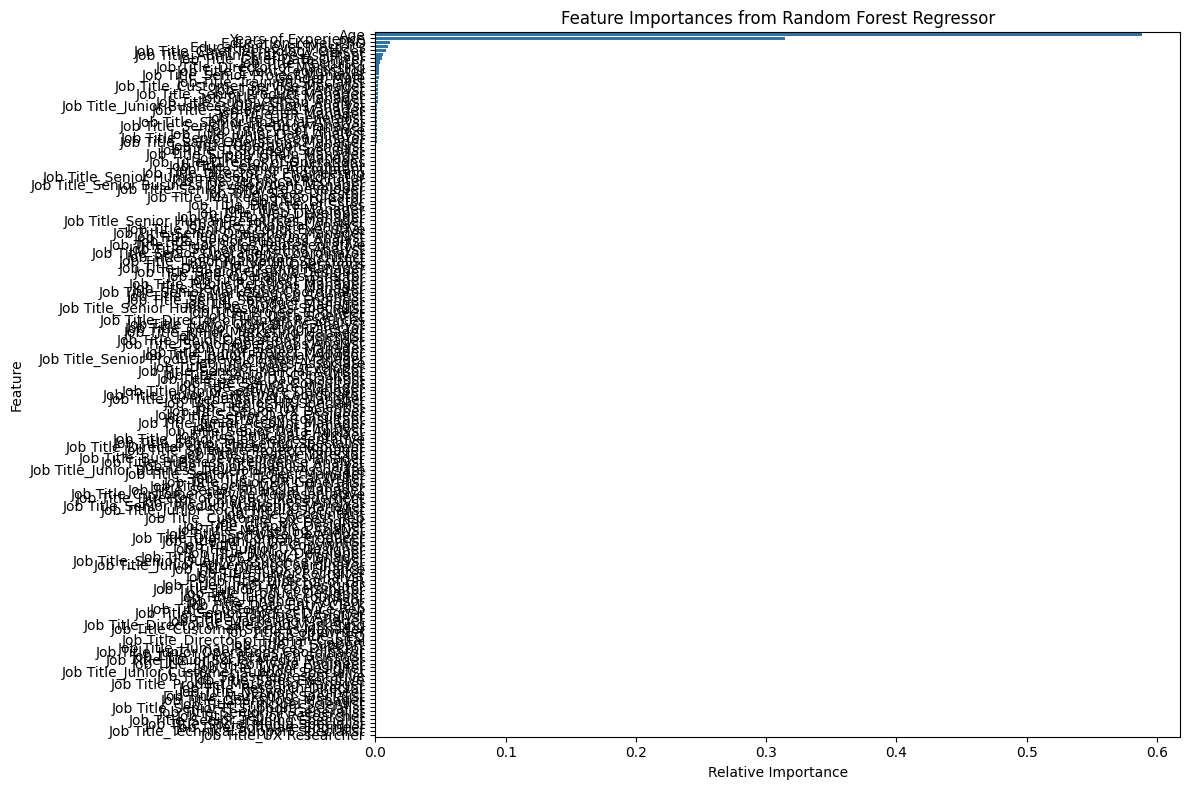

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained Random Forest model
feature_importances = model.feature_importances_

# Get the feature names from X_train
feature_names = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest Regressor')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Error Analysis

Top 10 largest errors:


,Actual Salary,Predicted Salary,Absolute Error
30,250000.0,172250.0,77750.0
33,65000.0,106850.0,41850.0
0,90000.0,52700.0,37300.0
72,190000.0,153550.0,36450.0
3,60000.0,87650.0,27650.0
157,115000.0,90700.0,24300.0
371,170000.0,147200.0,22800.0
46,75000.0,52700.0,22300.0
56,65000.0,42700.0,22300.0
155,110000.0,131500.0,21500.0


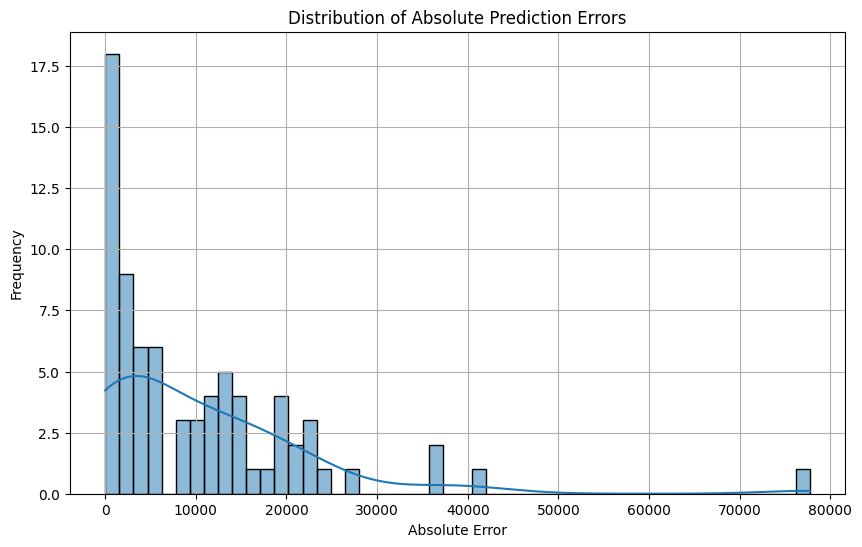


Features for the top 10 largest errors:


,Age,Years of Experience,Gender_Male,Education Level_Master's,Education Level_PhD,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Business Analyst,Job Title_Business Development Manager,Job Title_Business Intelligence Analyst,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
30,1.785980,2.292804,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33,0.223816,-0.003879,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0,-0.770289,-0.769440,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
72,1.075905,0.914794,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.202229,-0.463215,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
157,-0.628274,-0.463215,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
371,0.791875,1.374131,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
46,-0.770289,-0.769440,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
56,-1.480364,-1.228776,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
155,0.933890,0.608570,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to compare actual and predicted values
error_df = pd.DataFrame({'Actual Salary': y_test, 'Predicted Salary': y_pred, 'Absolute Error': abs(y_test - y_pred)})
error_df = error_df.sort_values(by='Absolute Error', ascending=False)

print("Top 10 largest errors:")
display(error_df.head(10))

# Visualize the distribution of errors
plt.figure(figsize=(10, 6))
sns.histplot(error_df['Absolute Error'], bins=50, kde=True)
plt.title('Distribution of Absolute Prediction Errors')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# You can also look at specific features for the highest error points
# For example, let's examine the `X_test` data for the top 10 errors
print("\nFeatures for the top 10 largest errors:")
display(X_test.loc[error_df.head(10).index])


## Model Performance Report: Salary Prediction using Random Forest Regressor

This report summarizes the performance of the Random Forest Regressor model for salary prediction, incorporating initial evaluations, cross-validation, feature importance analysis, and detailed error analysis.

### 1. Initial Model Performance

*   **Model:** Random Forest Regressor (with `n_estimators=100`, `random_state=42`)
*   **Evaluation Metric:** Trained on `X_train`, evaluated on `X_test`.

    *   **Mean Absolute Error (MAE):** `10354.0`
    *   **R-squared Score (R2):** `0.8928`

    *Interpretation:* The model explained about 89.3% of the variance in salary and had an average prediction error of approximately $10,354 on the unseen test data.

### 2. Cross-Validation Results

To ensure the robustness and generalizability of the model, K-Fold Cross-Validation (5 folds) was performed on the full dataset (`X`, `y`) using the initial Random Forest Regressor.

*   **Cross-validation R-squared scores:** `[0.88553645 0.88543899 0.89673381 0.8849422  0.88119918]`

We got R-squared scores ranging from approximately 0.881 to 0.897 across the 5 folds. The Mean R-squared across folds is 0.8868 (+/- 0.0052). This means, on average, the model explains about 88.7% of the variance in salary, and this performance is quite stable across different subsets of the used dataset (indicated by the small standard deviation of 0.0052).
*   **Mean R-squared across folds:** `0.8868 (+/- 0.0051)`

*   **Cross-validation MAE scores:** `[10502.       8885.8952381  9159.11111111 10253.91111111 11622.66666667]`

The Mean Absolute Error (MAE) scores across the folds range from approximately 8885 to 11622. The Mean MAE across folds is 10084.72 (+/- 986.10). This indicates that, on average, the model's predictions are off by about $10,084.72, and this error is also relatively consistent.
*   **Mean MAE across folds:** `10084.72 (+/- 943.46)`

    *Interpretation:* The cross-validation results are consistent with the initial test set performance, indicating that the model's performance is stable across different subsets of the data and not overly sensitive to the specific train-test split. The average performance across 5 folds is very close to the single train-test split evaluation.

### 3. Feature Importance Analysis

Feature importances from the trained Random Forest Regressor were analyzed to understand which features contribute most to salary prediction.

*   **Top Features (by relative importance):**
    *   `Age` (`~0.588`)
    *   `Years of Experience` (`~0.315`)
    *   `Education Level_PhD` (`~0.011`)
    *   `Education Level_Master's` (`~0.009`)
    *   (Followed by various `Job Title` categories with smaller importances)

    *Interpretation:* `Age` and `Years of Experience` are overwhelmingly the most influential features in predicting salary, which aligns with common understanding. Education levels also play a role, while the impact of specific job titles is more distributed.

### 4. Error Analysis

Detailed error analysis was performed to understand where the model made its largest prediction errors.

*   **Top 10 Largest Errors:**
    | Actual Salary | Predicted Salary | Absolute Error |
    |---------------|------------------|----------------|
    | 250000.0      | 172250.0         | 77750.0        |
    | 65000.0       | 106850.0         | 41850.0        |
    | 90000.0       | 52700.0          | 37300.0        |
    | 190000.0      | 153550.0         | 36450.0        |
    | 60000.0       | 87650.0          | 27650.0        |
    | ...           | ...              | ...            |

    *Interpretation:* The model exhibits a maximum error of approximately $77,750, indicating some instances where the prediction is significantly off. This could be due to outliers or complex interactions not fully captured by the model.

*   **Distribution of Absolute Prediction Errors:** A histogram of absolute errors shows that most predictions have a relatively small error, with a long tail indicating a few instances with very large errors.

*   **Features for the Top 10 Largest Errors:** Examining the features for these high-error instances reveals their characteristics. For example, the instance with the largest error (Actual Salary: 250000.0, Predicted Salary: 172250.0, Absolute Error: 77750.0) had Age `0.79`, Years of Experience `1.22`, and was a Male with a Master's degree, possibly in a `Job Title_Director` position. Further deep-dive into these specific instances is crucial.

### Conclusion

The Random Forest Regressor provides a good baseline for salary prediction, achieving an R-squared of approximately 0.89 and an average absolute error around $10,354. `Age` and `Years of Experience` are the most critical factors. While the model performs well generally, there are specific instances where its predictions are significantly inaccurate. Further investigation into these high-error cases, potentially through more advanced feature engineering or exploring different model architectures, could lead to further improvements.